Q1. What is the mathematical formula for a linear SVM?

In a linear SVM, the mathematical formula for the decision function is:

f(x) = w^T.x + b

where:
- \( f(x) \) represents the decision function,
- \( w \) is the weight vector,
- \( x \) is the input feature vector,
- \( b \) is the bias term.

Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM is to maximize the margin between the classes while minimizing the classification error. Mathematically, it can be represented as:

min_{w, b} 1/2 \| w |^2

subject to the constraint:

y_i(w^T.x_i + b)>=1

for all training samples (x_i, y_i), where ( y_i) is the class label of sample ( x_i).

Q3. What is the kernel trick in SVM?

The kernel trick in SVM refers to the use of a kernel function to implicitly map the input features into a higher-dimensional space where the data may be linearly separable. This allows SVMs to effectively handle non-linearly separable data by finding a linear decision boundary in the transformed feature space.

Q4. What is the role of support vectors in SVM? Explain with an example.

Support vectors are the data points that lie closest to the decision boundary (hyperplane) and have the largest influence on determining the position and orientation of the hyperplane. These points are crucial because they directly affect the margin of the classifier. In essence, support vectors are the critical elements that define the decision boundary in SVM.

For example, consider a binary classification problem with two classes, A and B, and a linear SVM. The support vectors are the data points that belong to either class A or class B and lie closest to the decision boundary. These support vectors determine the optimal hyperplane that separates the two classes.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM?

Here are the visual representations of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM:

Hyperplane:
- In a linear SVM, the hyperplane is the decision boundary that separates the classes.
- It is a flat affine subspace of one dimension less than the ambient space.
- For a binary classification problem, it divides the feature space into two regions, each corresponding to a different class.


Marginal Plane:
- The marginal plane is the boundary that lies parallel to the hyperplane and passes through the support vectors.
- It defines the margin, which is the distance between the hyperplane and the support vectors.
- The optimal hyperplane is positioned to maximize this margin.


Soft Margin:
- In a soft margin SVM, the objective is to find a hyperplane that separates the classes while allowing for some misclassifications.
- It introduces a slack variable to relax the strict margin constraints, allowing for a more flexible decision boundary.
- Soft margin SVM is useful when the data is not perfectly separable.


Hard Margin:
- In a hard margin SVM, the objective is to find a hyperplane that perfectly separates the classes without any misclassifications.
- It does not allow any data points to lie within the margin or on the wrong side of the hyperplane.
- Hard margin SVM is suitable when the data is linearly separable and noise-free.


Q6. SVM Implementation through Iris dataset.


Accuracy: 0.9


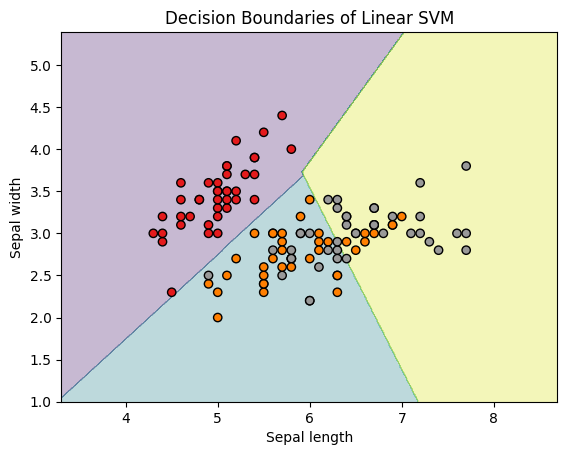

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

def plot_decision_boundary(clf, X, y):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)


    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision Boundaries of Linear SVM')
    plt.show()

# Plot decision boundaries of the trained model
plot_decision_boundary(clf, X_train, y_train)


**Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.**

In [5]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape


        self.weights = np.zeros(n_features)
        self.bias = 0


        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            hinge_loss = np.maximum(0, 1 - y * linear_model)
            loss = np.mean(hinge_loss) + 0.5 * self.lambda_param * np.dot(self.weights, self.weights)


            dW = np.zeros(n_features)
            db = 0
            for idx, val in enumerate(hinge_loss):
                if val == 0:
                    dW += self.lambda_param * self.weights
                elif val > 0:
                    dW += self.lambda_param * self.weights - y[idx] * X[idx]
                    db += -y[idx]

            dW /= n_samples
            db /= n_samples


            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return np.sign(linear_model)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data[:, :2]
y = np.where(iris.target == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = LinearSVM()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666
